<a href="https://colab.research.google.com/github/sarahf123/sfd-356/blob/main/Usedcarspriceprediction_(linearregr).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data collection and processing

In [ ]:
car_dataset=pd.read_csv("/content/car data.csv")
print(car_dataset)

    Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1        Dealer       Manual      0

In [ ]:
car_dataset=pd.DataFrame(car_dataset)
car_dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
car_dataset.shape
#checking no. of rows and coulmns in df car_daatset

(301, 9)

In [ ]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car_dataset.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [ ]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

is null() will check for null values

In [ ]:
#checking c distrib of categorical data
car_dataset.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [ ]:
#to count the no. of dealers n indivituals use .value_counts()
car_dataset.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [ ]:
car_dataset.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

encoding categorical data

In [ ]:
#encoding  Fuel_type column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

In [ ]:
car_dataset.replace({'Seller_Type':{'Dealer':0,'Indivitual':1}},inplace=True)

In [ ]:
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


In [ ]:
car_dataset.head()
#to get o/p together do run all option

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [ ]:
#splitting data n target
#drop the car name
X=car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
y=car_dataset['Selling_Price']
X


,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [ ]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [ ]:
#splitting training n test data
#random state is used when in df when there are continous values n then discontinous values then it is used,if u dont specify
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train ,y_test =train_test_split(X ,y ,test_size=0.1,random_state=2)

Model training
linear regression

In [ ]:
#loading the linear regression model
lin_reg_model=LinearRegression()

In [ ]:
from sklearn.linear_model import LinearRegression
X=X.apply(pd.to_numeric, errors='coerce')
y=y.apply(pd.to_numeric, errors='coerce')
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)
#splitting the training and testing data
X_train, X_test, y_train, y_test=train_test_split(X, y ,test_size=0.1, random_state=2)
#.fit is used for-
clf=LinearRegression().fit(X_train, y_train)

In [ ]:
lin_reg_model=LinearRegression()

In [ ]:
#model evaluation
#predicting on training data

training_data_prediction=clf.predict(X_train)

In [ ]:
#r squared error

error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared error :",error_score)

R squared error : 0.8739682506756723


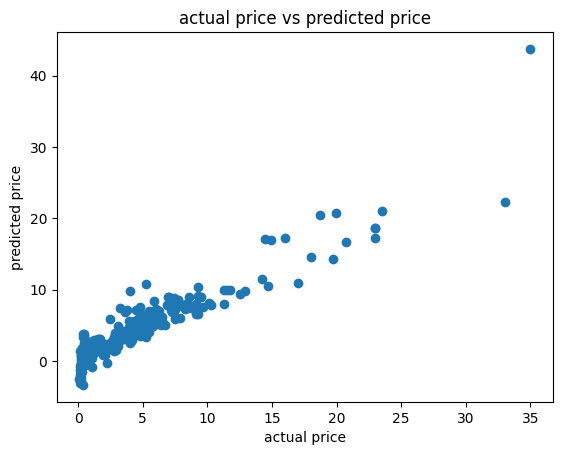

In [ ]:
#visualize the actual and predicted prices
plt.scatter(y_train, training_data_prediction)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual price vs predicted price")
plt.show()

In [ ]:
#prediction on testing data
testing_data_prediction=clf.predict(X_test)

In [ ]:
error_score=metrics.r2_score(y_test, testing_data_prediction)
print("r squared error:",error_score)

r squared error: 0.8028464620807498


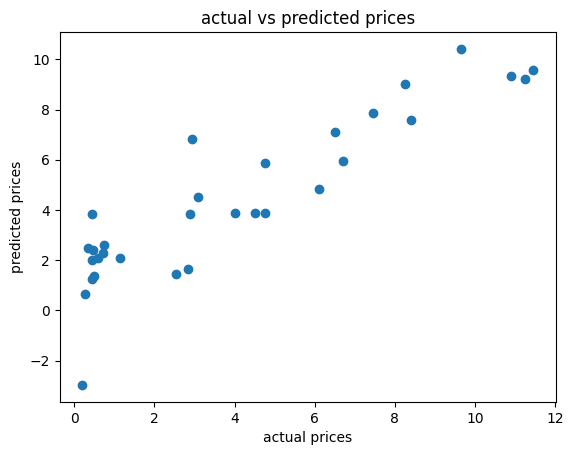

In [ ]:

#visualizing actual and predicted prices
plt.scatter(y_test, testing_data_prediction)
plt.xlabel("actual prices")
plt.ylabel("predicted prices")
plt.title("actual vs predicted prices")
plt.show()

lasso regression:

In [ ]:
#loading the linear regression model in lasso
lass_reg_model=Lasso()

In [ ]:
from sklearn.linear_model import Lasso
cld=Lasso().fit(X_train, y_train)

In [ ]:
#model evaluation
training_data_prediction=cld.predict(X_train)

In [ ]:
#r squared error
from sklearn.metrics import r2_score
error_score = metrics.r2_score(y_train, training_data_prediction)
print("r squared error:", error_score)

r squared error: 0.8427856123435794


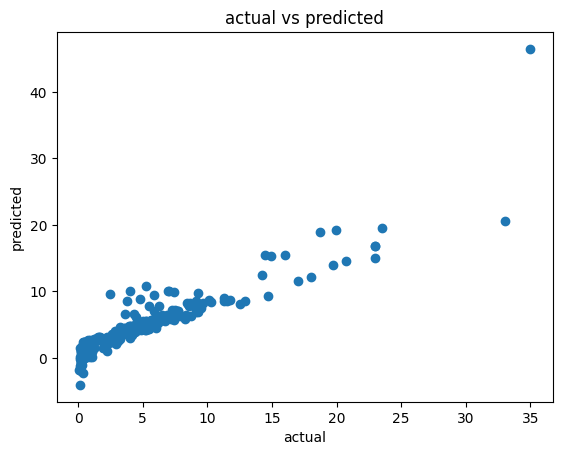

In [ ]:
#visualizing actual and predicted values
plt.scatter(y_train, training_data_prediction)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.title("actual vs predicted")
plt.show()

In [ ]:
#prediction on test data(model evaluation)
test_data_prediction=cld.predict(X_test)

In [ ]:

#r squared error
from sklearn.metrics import r2_score
error_score = metrics.r2_score(y_test, test_data_prediction)
print("r squared error:", error_score)

r squared error: 0.8709167941173195


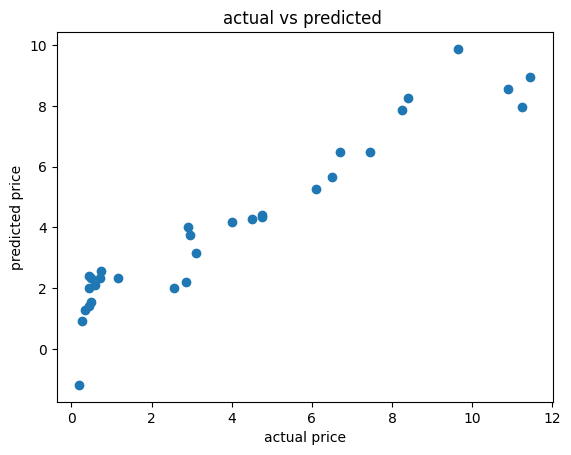

In [ ]:
#testing for visualization comparing predicted and actual prices
plt.scatter(y_test,test_data_prediction)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual vs predicted ")
plt.show()